In [1]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
# rename the columns
df = df[['v1','v2']]
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [7]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Text(0.5, 1.0, 'The distribution of ham and spam messages')

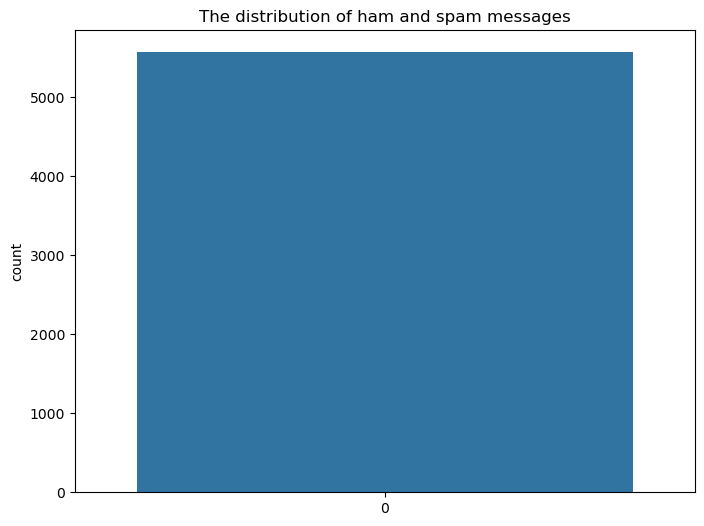

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df.label)
plt.title('The distribution of ham and spam messages')

In [9]:
ham_df = df[df['label']==0]
ham_df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
spam_df = df[df['label']==1]
spam_df

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [11]:
ham_msg_df = ham_df.sample(n = len(spam_df), random_state = 44)
spam_msg_df = spam_df

In [12]:
len(ham_msg_df)

747

In [13]:
len(spam_msg_df)

747

In [15]:
# Get length column for each text
df['text_length'] = df['message'].apply(len)
msg_label = df['label'].values
df.head()

,label,message,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], msg_label, test_size=0.2, random_state=101)

In [18]:
# Defining pre-processing parameters
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [19]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [20]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

7978

In [21]:
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [22]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [23]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (4457, 50)
Shape of testing tensor:  (1115, 50)


In [24]:
# Define parameter
vocab_size = 500 
embedding_dim = 16
drop_value = 0.2
n_dense = 24
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [27]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded,
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(testing_padded, y_test),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/30
140/140 - 4s - loss: 0.5108 - accuracy: 0.8578 - val_loss: 0.3302 - val_accuracy: 0.8762 - 4s/epoch - 31ms/step
Epoch 2/30
140/140 - 2s - loss: 0.3060 - accuracy: 0.8634 - val_loss: 0.2404 - val_accuracy: 0.8780 - 2s/epoch - 16ms/step
Epoch 3/30
140/140 - 2s - loss: 0.2013 - accuracy: 0.9192 - val_loss: 0.1469 - val_accuracy: 0.9534 - 2s/epoch - 16ms/step
Epoch 4/30
140/140 - 2s - loss: 0.1254 - accuracy: 0.9625 - val_loss: 0.1000 - val_accuracy: 0.9677 - 2s/epoch - 16ms/step
Epoch 5/30
140/140 - 2s - loss: 0.0905 - accuracy: 0.9729 - val_loss: 0.0790 - val_accuracy: 0.9713 - 2s/epoch - 17ms/step
Epoch 6/30
140/140 - 2s - loss: 0.0721 - accuracy: 0.9776 - val_loss: 0.0677 - val_accuracy: 0.9767 - 2s/epoch - 15ms/step
Epoch 7/30
140/140 - 2s - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0631 - val_accuracy: 0.9785 - 2s/epoch - 11ms/step
Epoch 8/30
140/140 - 2s - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0593 - val_accuracy: 0.9785 - 2s/epoch - 14ms/step
Epoch 9/30
140/1

In [28]:
model.evaluate(testing_padded, y_test)

35/35 [==============================] - 0s 7ms/step - loss: 0.0547 - accuracy: 0.9839


[0.054680418223142624, 0.9838565587997437]

In [29]:
train_dense_results = model.evaluate(training_padded, np.asarray(y_train), verbose=2, batch_size=256)
valid_dense_results = model.evaluate(testing_padded, np.asarray(y_test), verbose=2, batch_size=256)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')

18/18 - 0s - loss: 0.0210 - accuracy: 0.9933 - 157ms/epoch - 9ms/step
5/5 - 0s - loss: 0.0547 - accuracy: 0.9839 - 87ms/epoch - 17ms/step
Train accuracy: 99.33
Valid accuracy: 98.39


In [30]:
# Define parameter
n_lstm = 128
drop_lstm = 0.2
# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
__________________________________________________

In [32]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [33]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/30


InvalidArgumentError: Graph execution error:

No OpKernel was registered to support Op 'CudnnRNN' used by {{node CudnnRNN}} with these attrs: [seed=0, dropout=0, T=DT_FLOAT, input_mode="linear_input", direction="unidirectional", rnn_mode="lstm", seed2=0, is_training=true]
Registered devices: [CPU, GPU]
Registered kernels:
  <no registered kernels>

	 [[CudnnRNN]]
	 [[sequential_1/lstm/PartitionedCall]] [Op:__inference_train_function_18300]

In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]